# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

In [ ]:
路径的cost需要相等

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

In [ ]:
对于深度进行限制就可以找到最优解，也就是从深度限制为1开始做深度优先搜索，搜索的层数为1，逐步增加深度的限制，这样可以找到最优解

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

In [ ]:
如果需要找到问题的最优解，则BFS好于DFS， 如果需要找到全部的解则DFS 好于BFS

##### 2.4 When can we use machine learning ?

In [ ]:
使用数据去训练模型，然后将模型应用在未使用的数据上，并且有很好的表现

##### 2.5 What is the gradient of a function ?

In [ ]:
梯度是函数在某一点上的切线方向

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

In [ ]:
梯度的方向是函数增长最快的方向，朝着梯度方向运动就可以找到函数的最大值

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2

In [2]:
from bs4 import BeautifulSoup


url='https://map.bjsubway.com/subwaymap/beijing.xml?v=2' #需要爬数据的网址

request = urllib2.Request(url)

response = urllib2.urlopen(request, timeout=100)

content = response.read()

soup = BeautifulSoup(content, 'html.parser')

In [3]:
all_subway = soup.find_all('l')


In [79]:
#字典存放线路
all_line_ = dict()
#限制读取的线路条数
number = 50
for i,sub in enumerate(all_subway):


    for j in sub.find_all('p'):
        if sub['lb'] in all_line_.keys():
            all_line_[sub['lb']].append((j['lb'],j['x'],j['y']))
        else:
            all_line_[sub['lb']]=[]
            all_line_[sub['lb']].append((j['lb'],j['x'],j['y']))
    
        


In [80]:
all_line_

{'1号线': [('苹果园', '285', '770'),
  ('古城', '310', '790'),
  ('八角游乐园', '363', '790'),
  ('八宝山', '407', '790'),
  ('玉泉路', '448', '790'),
  ('五棵松', '488', '790'),
  ('万寿路', '533', '790'),
  ('公主坟', '589', '790'),
  ('军事博物馆', '628', '790'),
  ('木樨地', '688', '790'),
  ('南礼士路', '733', '790'),
  ('复兴门', '783', '790'),
  ('西单', '862', '790'),
  ('天安门西', '922', '790'),
  ('天安门东', '979', '790'),
  ('王府井', '1034', '790'),
  ('东单', '1065', '790'),
  ('建国门', '1134', '790'),
  ('永安里', '1184', '790'),
  ('国贸', '1236', '790'),
  ('大望路', '1288', '790'),
  ('四惠', '1334', '790'),
  ('四惠东', '1373', '790')],
 '2号线': [('西直门', '783', '660'),
  ('', '806', '632'),
  ('积水潭', '851', '632'),
  ('鼓楼大街', '950', '632'),
  ('安定门', '1007', '632'),
  ('雍和宫', '1065', '632'),
  ('', '1110', '632'),
  ('东直门', '1134', '655'),
  ('东四十条', '1134', '698'),
  ('朝阳门', '1134', '738'),
  ('建国门', '1134', '790'),
  ('', '1134', '820'),
  ('北京站', '1128', '836'),
  ('', '1114', '841'),
  ('崇文门', '1065', '841'),
  ('前门', '951', '841'),


In [142]:
#得到每个站点所在的线路
line_name_dict=dict()
for lin_name in all_line_.keys():
    for subname in all_line_[lin_name]:
        if subname[0] in line_name_dict.keys():
            line_name_dict[subname[0]].append(lin_name)
            continue
        line_name_dict[subname[0]]=[]
        line_name_dict[subname[0]].append(lin_name)

In [143]:
line_name_dict

{'苹果园': ['1号线'],
 '古城': ['1号线'],
 '八角游乐园': ['1号线'],
 '八宝山': ['1号线'],
 '玉泉路': ['1号线'],
 '五棵松': ['1号线'],
 '万寿路': ['1号线'],
 '公主坟': ['1号线', '10号线'],
 '军事博物馆': ['1号线', '9号线'],
 '木樨地': ['1号线'],
 '南礼士路': ['1号线'],
 '复兴门': ['1号线', '2号线'],
 '西单': ['1号线', '4号线大兴线'],
 '天安门西': ['1号线'],
 '天安门东': ['1号线'],
 '王府井': ['1号线'],
 '东单': ['1号线', '5号线'],
 '建国门': ['1号线', '2号线'],
 '永安里': ['1号线'],
 '国贸': ['1号线', '10号线'],
 '大望路': ['1号线', '14号线(东)'],
 '四惠': ['1号线', '八通线'],
 '四惠东': ['1号线', '八通线'],
 '西直门': ['2号线', '4号线大兴线', '13号线'],
 '': ['2号线',
  '2号线',
  '2号线',
  '2号线',
  '2号线',
  '2号线',
  '4号线大兴线',
  '4号线大兴线',
  '4号线大兴线',
  '6号线',
  '6号线',
  '6号线',
  '7号线',
  '7号线',
  '8号线南',
  '10号线',
  '10号线',
  '10号线',
  '10号线',
  '10号线',
  '10号线',
  '10号线',
  '10号线',
  '10号线',
  '13号线',
  '13号线',
  '15号线',
  '15号线',
  '15号线',
  '八通线',
  '八通线',
  '昌平线',
  '昌平线',
  '昌平线',
  '昌平线',
  '昌平线',
  '昌平线',
  'S1线',
  'S1线',
  'S1线',
  '西郊线',
  '西郊线',
  '西郊线',
  '西郊线',
  '首都机场线',
  '首都机场线',
  '首都机场线',
  '首都机场线',
  '首都机场线',
  '首都机场线',
  '

In [6]:
all_line = []
sub_line=[]
for i,sub in enumerate(all_subway):
    if i > number:
        break
    for i,j in enumerate(sub.find_all('p')):
        
        #空的部分是为了画出正确的线路，在这里由于只是为了找到正确的站点路径，所以去掉了空站点
        if j['lb']=="":
            continue
        
        if i!=0:
            sub_line.append((j['lb'],j['x'],j['y']))
        else:
            
            all_line.append(sub_line)
            sub_line=[]
            sub_line.append((j['lb'],j['x'],j['y']))
all_line.append(sub_line)

In [7]:
all_subway[0]['lb']

'1号线'

In [8]:
#删除第一个空
all_line.remove([])

In [9]:
all_line

[[('苹果园', '285', '770'),
  ('古城', '310', '790'),
  ('八角游乐园', '363', '790'),
  ('八宝山', '407', '790'),
  ('玉泉路', '448', '790'),
  ('五棵松', '488', '790'),
  ('万寿路', '533', '790'),
  ('公主坟', '589', '790'),
  ('军事博物馆', '628', '790'),
  ('木樨地', '688', '790'),
  ('南礼士路', '733', '790'),
  ('复兴门', '783', '790'),
  ('西单', '862', '790'),
  ('天安门西', '922', '790'),
  ('天安门东', '979', '790'),
  ('王府井', '1034', '790'),
  ('东单', '1065', '790'),
  ('建国门', '1134', '790'),
  ('永安里', '1184', '790'),
  ('国贸', '1236', '790'),
  ('大望路', '1288', '790'),
  ('四惠', '1334', '790'),
  ('四惠东', '1373', '790')],
 [('西直门', '783', '660'),
  ('积水潭', '851', '632'),
  ('鼓楼大街', '950', '632'),
  ('安定门', '1007', '632'),
  ('雍和宫', '1065', '632'),
  ('东直门', '1134', '655'),
  ('东四十条', '1134', '698'),
  ('朝阳门', '1134', '738'),
  ('建国门', '1134', '790'),
  ('北京站', '1128', '836'),
  ('崇文门', '1065', '841'),
  ('前门', '951', '841'),
  ('和平门', '904', '841'),
  ('宣武门', '862', '841'),
  ('长椿街', '787', '833'),
  ('复兴门', '783', '790'),
  ('阜

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [10]:
#由于地铁肯定和前后方向相邻，所以直接将前后方向的站加入数组中
connect_info = dict()
for i in range(len(all_line)):
    for j in range(len(all_line[i])):
        key_dic = all_line[i][j][0]
        if key_dic=="":
            key_dic=str(i)+str(j)
        before_name =""
        after_name =""
        if j > 0:
            before_name = all_line[i][j-1][0]
            if before_name=="":
                before_name = str(i)+str(j-1)
        if j < len(all_line[i])-1:
            after_name = all_line[i][j+1][0]
            if after_name=="":
                after_name = str(i)+str(j+1)           
   
            
        if key_dic in connect_info.keys():
            if j > 0:
                connect_info[key_dic].append(before_name)
            if j < len(all_line[i])-1:
                connect_info[key_dic].append(after_name)
                
        else:
            connect_info[key_dic]=[]
                
            if j > 0:
                connect_info[key_dic].append(before_name)
            if j < len(all_line[i])-1:
                connect_info[key_dic].append(after_name)



In [11]:
connect_info

{'苹果园': ['古城'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '灯市口', '崇文门'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '西直门': ['积水潭', '动物园', '新街口', '大钟寺'],
 '积水潭': ['西直门', '鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '和平里北街', '北新桥'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥', '三元桥'],
 '东四十条': ['东直门', '朝阳门'],
 '朝阳门': ['东四十条', '建国门', '东四', '东大桥'],
 '北京站': ['建国门', '崇文门'],
 '崇文门': ['北京站', '前门'

In [12]:
all_name = dict()
for j, sub_data in enumerate(all_line):
    for i, sub_name in enumerate(sub_data):
        if sub_name[0]=="":
            all_name[str(j)+str(i)+sub_name[0]]=(int(sub_name[1]),int(sub_name[2]))
            
        if sub_name[0] in all_name.keys():
            continue
            continue
        all_name[sub_name[0]]=(int(sub_name[1]),int(sub_name[2]))

In [13]:
all_name

{'苹果园': (285, 770),
 '古城': (310, 790),
 '八角游乐园': (363, 790),
 '八宝山': (407, 790),
 '玉泉路': (448, 790),
 '五棵松': (488, 790),
 '万寿路': (533, 790),
 '公主坟': (589, 790),
 '军事博物馆': (628, 790),
 '木樨地': (688, 790),
 '南礼士路': (733, 790),
 '复兴门': (783, 790),
 '西单': (862, 790),
 '天安门西': (922, 790),
 '天安门东': (979, 790),
 '王府井': (1034, 790),
 '东单': (1065, 790),
 '建国门': (1134, 790),
 '永安里': (1184, 790),
 '国贸': (1236, 790),
 '大望路': (1288, 790),
 '四惠': (1334, 790),
 '四惠东': (1373, 790),
 '西直门': (783, 660),
 '积水潭': (851, 632),
 '鼓楼大街': (950, 632),
 '安定门': (1007, 632),
 '雍和宫': (1065, 632),
 '东直门': (1134, 655),
 '东四十条': (1134, 698),
 '朝阳门': (1134, 738),
 '北京站': (1128, 836),
 '崇文门': (1065, 841),
 '前门': (951, 841),
 '和平门': (904, 841),
 '宣武门': (862, 841),
 '长椿街': (787, 833),
 '阜成门': (783, 750),
 '车公庄': (783, 710),
 '安河桥北': (457, 410),
 '北宫门': (516, 410),
 '西苑': (567, 410),
 '圆明园': (628, 438),
 '北京大学东门': (628, 472),
 '中关村': (628, 500),
 '海淀黄庄': (628, 543),
 '人民大学': (628, 587),
 '魏公村': (628, 626),
 '国家图书馆': (628, 6

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(all_name.keys()))

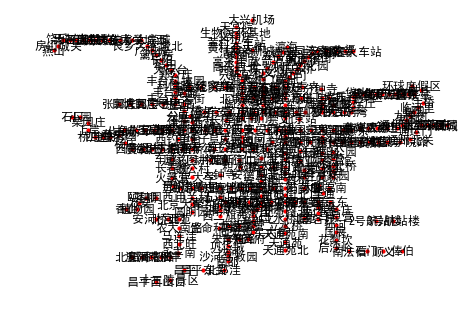

In [16]:
nx.draw(city_graph, all_name, with_labels=True, node_size=10)

In [17]:
from collections import defaultdict
subway_connection = defaultdict(list)
subways = list(all_name.keys())



In [18]:
connect_info

{'苹果园': ['古城'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '灯市口', '崇文门'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '西直门': ['积水潭', '动物园', '新街口', '大钟寺'],
 '积水潭': ['西直门', '鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '和平里北街', '北新桥'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥', '三元桥'],
 '东四十条': ['东直门', '朝阳门'],
 '朝阳门': ['东四十条', '建国门', '东四', '东大桥'],
 '北京站': ['建国门', '崇文门'],
 '崇文门': ['北京站', '前门'

In [19]:
subways_connection_graph = nx.Graph(connect_info)

G:\Coding\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


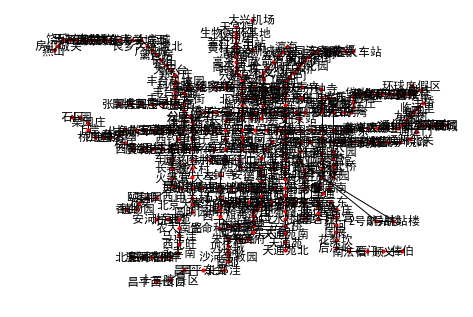

In [20]:
nx.draw(subways_connection_graph,all_name,with_labels=True,node_size=10)
plt.show()

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [102]:
#优先队列,最小的优先级最高
from heapq import heappush, heappop
class PriorityQueue:
    def __init__(self):
        self._queue = []
        
    def put(self, item, priority):
        heappush(self._queue, (priority, item))
 
    def get(self):
        return heappop(self._queue)[-1]



In [68]:
#计算距离
import math
def get_distance(point1,point2):
    return math.sqrt(pow(point1[0]-point2[0],2)+pow(point1[1]-point2[1],2))
#distance((0,0),(3,4))

In [75]:
#最近的距离，通过优先队列
def search_1(graph,start,destination):
    #pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    pq = PriorityQueue()
    pq.put(([start],0),0)
    
    #while pathes:
    while pq:
        #队列从前面出后面入
        #path = pathes.pop(0)  #提取第一条路径
        pq_get = pq.get()
        path = pq_get[0]
        distance = pq_get[1]
        froniter = path[-1]   #提取即将要探索的节点
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
        successsors = graph[froniter]
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            new_distance = distance + get_distance(all_name[path[-1]],all_name[city])
            #pathes.append(new_path)  #bfs     #将新路径加到list里面
            pq.put((new_path,new_distance),new_distance)
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [76]:
search_1(connect_info,"苹果园","六里桥")

['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '莲花桥', '六里桥']

In [146]:
#最少换乘
#最近的距离，通过优先队列,优先级是换成的车站数目
def search_2(graph,start,destination):
    #pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    pq = PriorityQueue()
    pq.put(([start],0,line_name_dict[start]),0)
    #while pathes:
    
    debug=[]
    debug.append(([start],0))
    while pq:
        #队列从前面出后面入
        #path = pathes.pop(0)  #提取第一条路径
        pq_get = pq.get()
        path = pq_get[0]
#         print("-------------------------------------")
#         print("get path :",path)
        distance = pq_get[1]
        line_name=pq_get[2]
        debug.remove((path,distance))
        froniter = path[-1]   #提取即将要探索的节点
        #print("line_name",line_name)
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
        successsors = graph[froniter]
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            new_distance = distance
            if line_name not in line_name_dict[city]:
                new_distance+=1
                #pathes.append(new_path)  #bfs     #将新路径加到list里面

            pq.put((new_path,new_distance,line_name_dict[city]),new_distance)
            #pathes = [new_path] + pathes #dfs
            debug.append((new_path,new_distance))
#             print("-------------------------------------")
#             for i in debug:
#                 print(i)
                
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
            
        visited.add(froniter)

In [147]:
search_2(connect_info,"苹果园","西局")

['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '莲花桥', '六里桥', '西局']

In [ ]:
#C部分，使用距离和换乘共同作为优先级的考量标准

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 